---
### 7.1.1 一维插值
#### 1. 多项式插值
利用待定系数法确定插值多项式

满足插值条件的次数不超过 $n$ 的插值多项式存在且唯一

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
x0 = np.arange(1, 7)
y0 = np.array([16, 18, 21, 17, 15, 12])
A = np.vander(x0)   # 范德蒙行列式
p = np.linalg.inv(A) @ y0   # 求插值多项式的系数
print("从高到低插值多项式的系数为：\n", np.round(p, 4))

从高到低插值多项式的系数为：
 [  -0.2417    4.3333  -28.9583   87.6667 -115.8      69.    ]


In [3]:
prediction = np.polyval(p, [1.5, 2.6])
print("预测值为：\n", prediction)

预测值为：
 [14.91796875 20.884608  ]


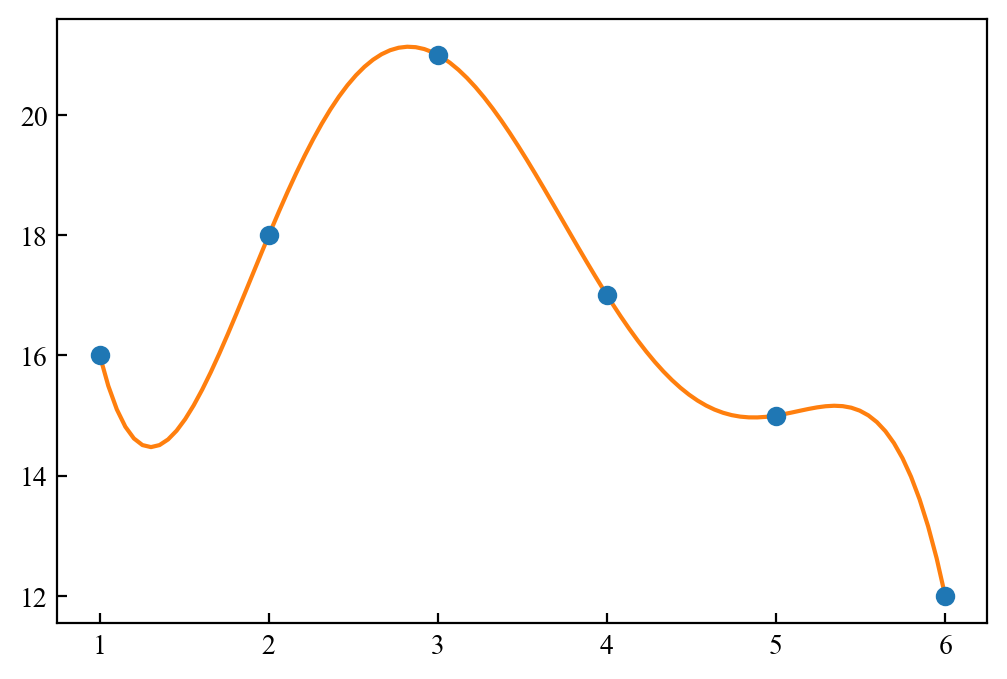

In [4]:
xs = np.linspace(1, 6, 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x0, y0, 'o', zorder=10)
ax.plot(xs, np.polyval(p, xs))
fig.show()

#### 2. 拉格朗日插值法
$n+1$ 个节点的 $n$ 次拉格朗日插值多项式存在且唯一

In [5]:
from scipy.interpolate import lagrange
p = lagrange(x0, y0)
print("从高到低插值多项式的系数为：\n", np.round(p, 4)) # 与上面的结果相同，但过程更直接
prediction = np.polyval(p, [1.5, 2.6])
print("预测值为：\n", prediction)

从高到低插值多项式的系数为：
 [  -0.2417    4.3333  -28.9583   87.6667 -115.8      69.    ]
预测值为：
 [14.91796875 20.884608  ]


#### 3. 牛顿插值
优点是每增加一个节点，插值多项式只增加一项，计算量小于拉格朗日插值

#### 4. 分段线性插值
对于拉格朗日插值，因为使用用多项式作插值函数，随着插值节点的增加，多项式次数也会升高，高次插值不但计算复杂且往往效果不理想，甚至可能产生龙格现象 (插值次数越高，插值结果越偏离原函数的现象)

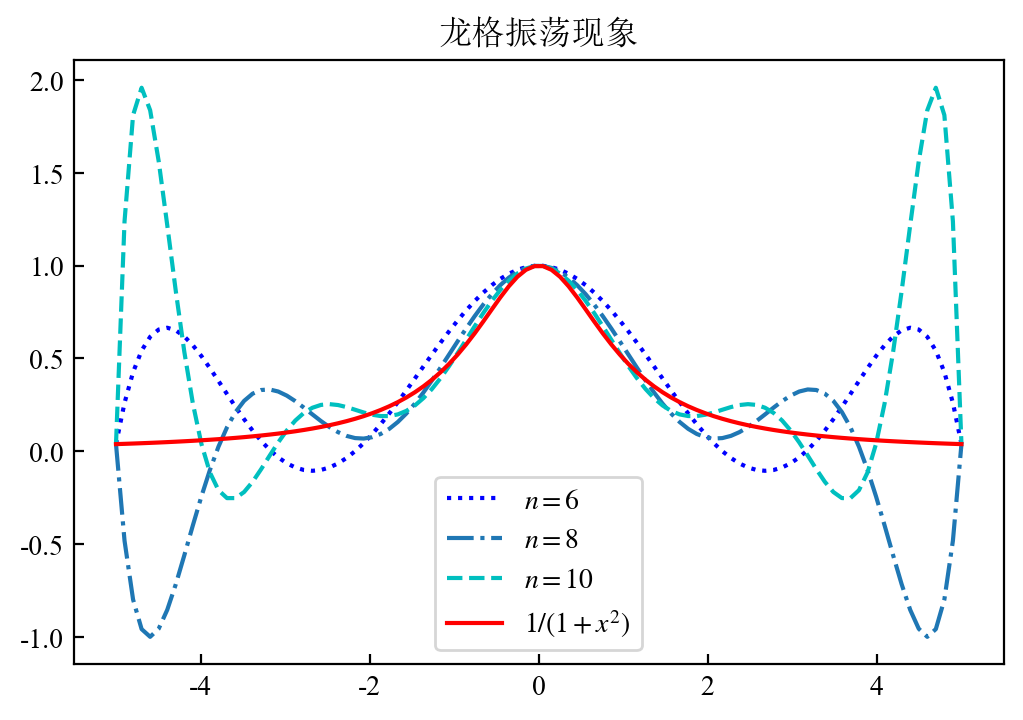

In [6]:
yx = lambda x: 1/(1+x**2)

def fun(n):
    x = np.linspace(-5, 5, n+1)
    p = lagrange(x, yx(x))  # n次插值多项式
    return p

x0 = np.linspace(-5, 5, 100)
N = [6, 8, 10]
s = [':b', '-.', '--c']
for k in range(len(N)):
    p = fun(N[k])
    plt.plot(x0, np.polyval(p,x0),s[k])
plt.plot(x0, yx(x0), 'r')
plt.legend(['$n=6$', '$n=8$', '$n=10$', '$1/(1+x^2)$'])
plt.title("龙格振荡现象")
plt.show()

分段线性插值简单地说就是将相邻的两个节点用线段连接起来，其优点在于有很好的收敛性。当插值节点的个数趋于无穷时，插值函数无限逼近被插函数
#### 5. 三次样条插值
每个小区间内是三次函数，在整个插值区间上有连续的二阶导数，且在边界处满足自由边界条件、固定边界条件、周期边界条件之一

---
### 7.1.2 二维插值
#### 1. 面向网格节点的插值
##### (1) 最近邻点插值
取插值点的函数值为其最近邻插值节点的函数值 (一般不连续) (相当于 0 阶样条插值)
##### (2) 分片线性插值
对应于一维情形的分段线性插值，其基本思想是在网格 $x_i\leq x\leq x_{i+1},\ y_j\leq y\leq y_{j+1}$ 内，连接节点 $(x_i,y_i)$ 和 $(x_j,y_j)$ 构成一条直线段，该线段分别与上下两侧网格线的连线所围成的两个平面就是在该网格内的分片线性插值函数
##### (3) 双线性插值
在网格 $x_i\leq x\leq x_{i+1},\ y_j\leq y\leq y_{j+1}$ 内，设其双线性插值函数形式为
$$
f(x,y)=Axy+Bx+Cy+D
$$
分别将矩形的 4 个顶点代入即可解出 4 个待定系数。采用拉格朗日插值构造方法也可以给出插值函数表达式

#### 2. 面向散乱数据的插值
##### 反距离加权平均方法 (Shepard 方法)
由已知数据点的观测值估算任意非观测点 $(x,y)$ 处的函数值，其影响程度按距离远近不同而不同，距离越远影响程度越低。因此每一观测点的函数值对 $(x,y)$ 处函数值的影响可以用两个点之间距离平方的倒数，即反距离来度量，所有数据点对  $(x,y)$ 处函数值的影响可以采用加权平均的形式来估算

按 Shepard 方法定义的插值曲面是全局相关的，对曲面的任一点作插值计算都要涉及全体观测数据。当实测数据点过多，空间范围过大时，工作量会偏大。此外插值函数在每个插值节点附近产生一个小“平台”，使曲面不具有光滑性

为了提高光滑性，可以定义一个函数 $\omega(r)$ 来代替 $1/r^2$，$\omega(r)$ 的定义见 `P196`

---
### 7.1.3 用 Python 求解插值问题
#### 1. 一维插值

Text(0.5, 1.0, '三次样条插值')

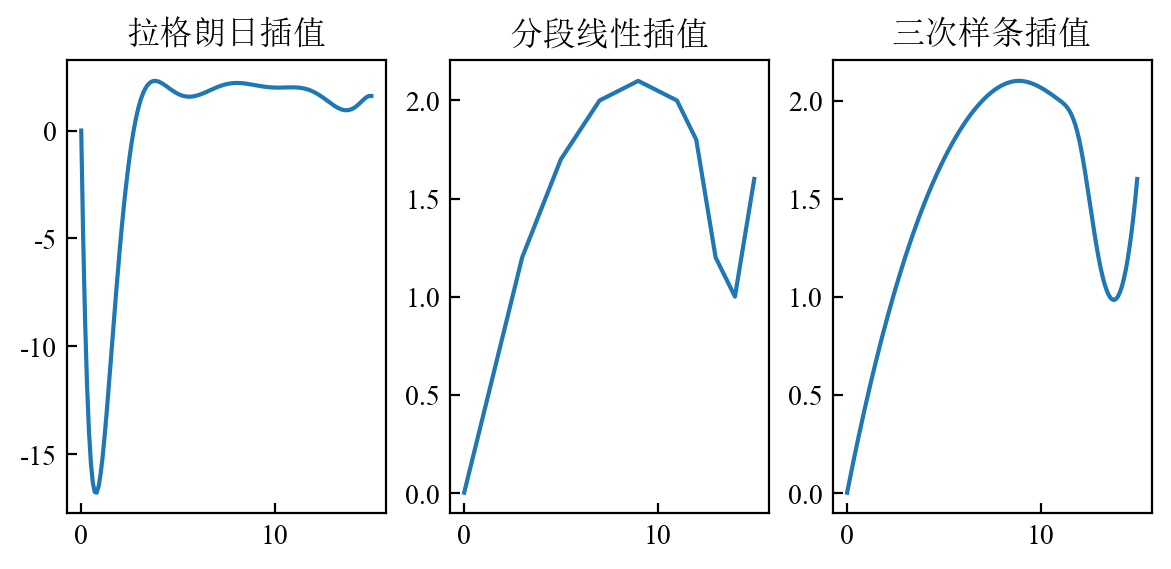

In [7]:
from scipy.interpolate import interp1d, lagrange

data = np.loadtxt('../../07第7章  插值与拟合/data7_4.txt')
x0, y0 = data 
x = np.linspace(0, 15, 151)

# 拉格朗日插值
p = lagrange(x0, y0)
y1 = np.polyval(p, x)

# 分段线性插值
f2 = interp1d(x0, y0)
y2 = f2(x)

# 三次样条插值
f3 = interp1d(x0, y0, 'cubic')
y3 = f3(x)

fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(131)
ax.plot(x, y1)
ax.set_title("拉格朗日插值")
ax1 = fig.add_subplot(132)
ax1.plot(x, y2)
ax1.set_title("分段线性插值")
ax2 = fig.add_subplot(133)
ax2.plot(x, y3)
ax2.set_title("三次样条插值")

In [8]:
dx, dy = np.diff(x), np.diff(y3)
dydx = dy/dx
print("x=0 处的曲线斜率为：", dydx[0])
ymin = np.min(y3[130:])
xmin = x[y3==ymin][0]
print(f"{xmin = }\n{ymin = }")

x=0 处的曲线斜率为： 0.49861178936089723
xmin = 13.8
ymin = 0.9828376856170427


---
`interp1d()` 使用给定的 $x$ 构建平滑 B-样条

`UnivariateSpline()` 基于 FITPACK，同样构建 B-样条，但是会重选新点来构建，以更好地拟合数据

数据较密集时二者结果相近，但数据稀疏时可能有较大不同 ↓

In [29]:
from scipy.interpolate import UnivariateSpline
t0 = np.array([0.15, 0.16, 0.17, 0.18])
v0 = np.array([3.5, 1.5, 2.5, 2.8])
sp1 = UnivariateSpline(t0, v0)
print(sp1.get_coeffs())
print("使用 UnivariateSpline() 的积分值：", sp1.integral(0.15, 0.18))
sp2 = interp1d(t0, v0, 'cubic')
t = np.linspace(0.15, 0.18, 200)
v = sp2(t)
I2 = np.trapz(v, t) # 梯形面积积分 v to t
print("使用 interp1d() 的积分值：\t", I2)

[ 3.5        -1.23333333  4.08333333  2.8       ]
使用 UnivariateSpline() 的积分值： 0.06862499999999995
使用 interp1d() 的积分值：	 0.06862565339259107


---

In [50]:
data = np.loadtxt('../../07第7章  插值与拟合/data7_6.txt')
x0 = data[0::3].flatten()
y10 = data[1::3].flatten()
y20 = data[2::3].flatten()
f1 = UnivariateSpline(x0, y10)
f2 = UnivariateSpline(x0, y20)
df1 = f1.derivative(1)
df2 = f2.derivative(1)

a, b = np.min(x0), np.max(x0)
x = np.linspace(a, b, 1000)
I1 = np.trapz(np.sqrt(1 + (df1(x))**2), x)
I2 = np.trapz(np.sqrt(1 + (df2(x))**2), x)
C = I1 + I2
S = np.trapz(f2(x) - f1(x), x)

rate = 40/18
real_S = 41288/rate**2
print("边界近似长度：", C*rate)
print("国土近似面积：", S*rate**2)
print("面积相对误差：", round(np.abs(S-real_S)/real_S * 100, 2), '\b%')

边界近似长度： 1163.6826071505914
国土近似面积： 42434.46530447119
面积相对误差： 2.78%


直接采用数值积分计算

In [51]:
C = np.trapz(np.sqrt(1+np.gradient(y10, x0)**2) +
            np.sqrt(1+np.gradient(y20, x0)**2), x0)
S = np.trapz(y20 - y10, x0)
print("边界近似长度：", C*rate)
print("国土近似面积：", S*rate**2)
print("面积相对误差：", round(np.abs(S-real_S)/real_S * 100, 2), '\b%')

边界近似长度： 1107.3141353729147
国土近似面积： 42413.58024691359
面积相对误差： 2.73%


---
#### 2. 二维网格节点插值

In [255]:
from scipy.interpolate import interp2d
from numpy.linalg import norm

z0 = np.loadtxt('../../07第7章  插值与拟合/data7_7.txt')
x0 = np.arange(0, 1500, 100)
y0 = np.arange(1200, -100, -100) # 鉴于原数据第一行对应的 y最大，y0的顺序也需要调整，以配合 interp2d函数
f = interp2d(x0, y0, z0)    # 双线性插值

x = np.arange(0, 1410, 10)
y = np.arange(0, 1210, 10)
z = f(x, y)     # 列为 x, 行为 y

# 用分片线性插值的思想、海伦公式求表面积
m, n = len(x), len(y)
S = 0
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1 = np.array([x[i], y[j], z[j,i]])
        p2 = np.array([x[i+1], y[j], z[j,i+1]])
        p3 = np.array([x[i+1], y[j+1], z[j+1,i+1]]) # p1, p3为对角
        p4 = np.array([x[i], y[j+1], z[j+1,i]])
        d12 = norm(p1 - p2)
        d23 = norm(p2 - p3)
        d34 = norm(p3 - p4)
        d14 = norm(p1 - p4)
        d13 = norm(p1 - p3)
        P1 = (d12 + d23 + d13)/2
        S1 = np.sqrt(P1*(P1-d12)*(P1-d23)*(P1-d13))
        P2 = (d14 + d34 + d13)/2
        S2 = np.sqrt(P2*(P2-d14)*(P2-d34)*(P2-d13))
        S += S1 + S2

print("区域面积为：", S)

区域面积为： 4264891.353919768


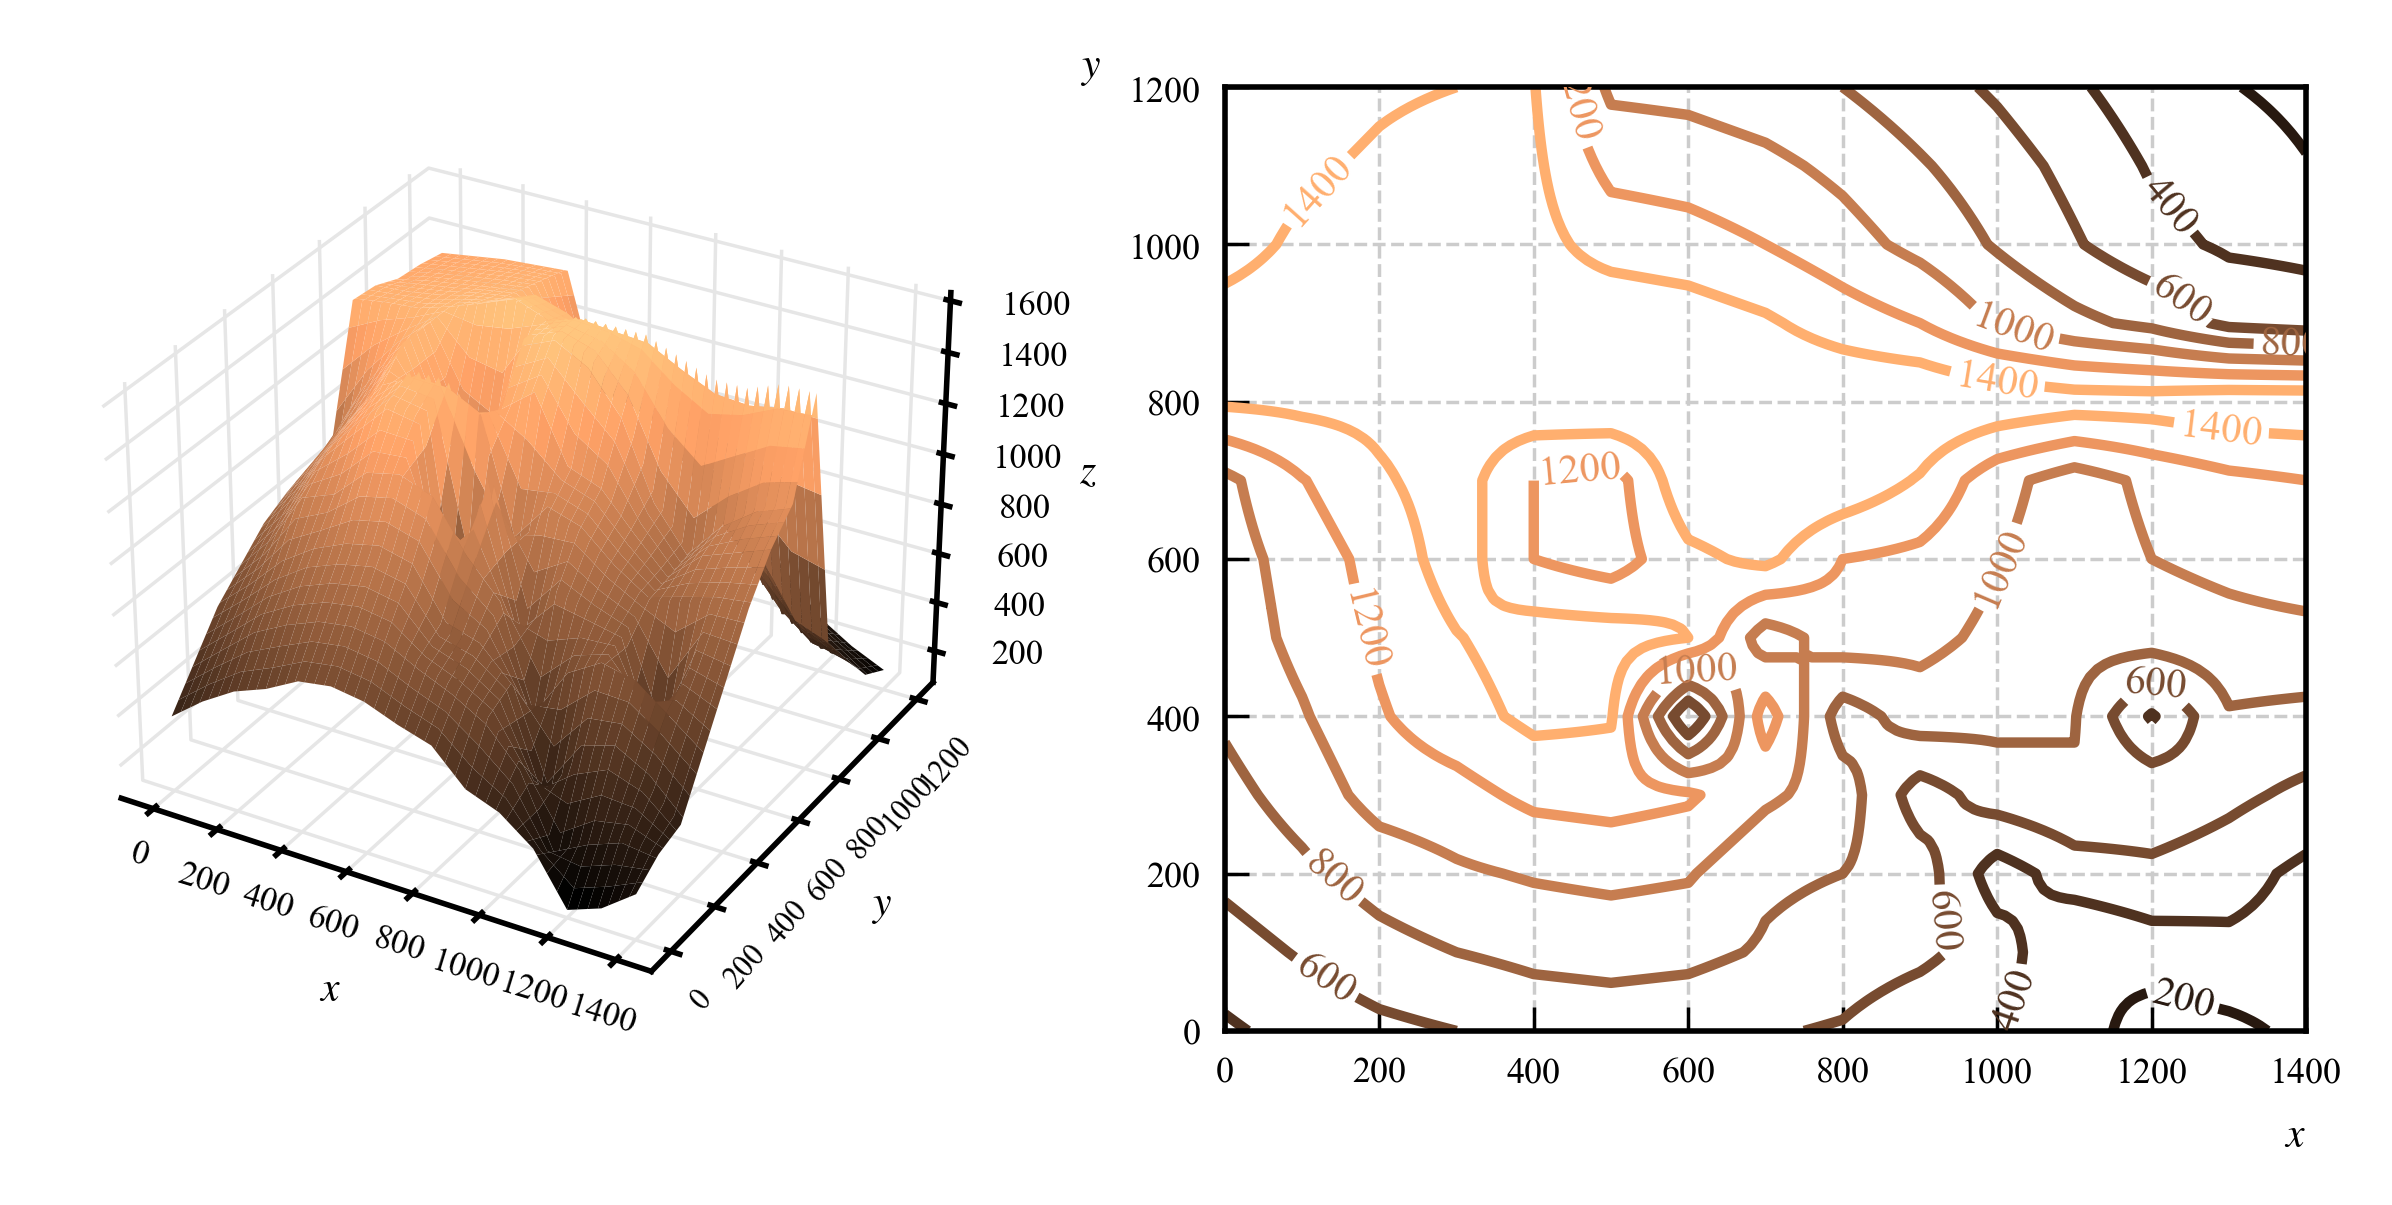

In [257]:
X, Y = np.meshgrid(x, y)

fig = plt.figure(dpi=500, figsize=(6, 2.5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, z, cmap='copper')
ax.set_xlabel('$x$', fontsize=6, labelpad=-10)
ax.set_ylabel('$y$', fontsize=6, labelpad=-10)
ax.set_zlabel('$z$', fontsize=6, labelpad=-8)
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.tick_params(which='major', width=0.5, labelsize=5, axis='z', pad=-0.5)
ax.tick_params(which='major', width=0.5, labelsize=5, axis='x', pad=-5, rotation=-17)
ax.tick_params(which='major', width=0.5, labelsize=4.5, axis='y', pad=-4, rotation=49)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['linewidth'] =  0.5
ax.yaxis._axinfo["grid"]['linewidth'] =  0.5
ax.zaxis._axinfo["grid"]['linewidth'] =  0.5
ax.xaxis._axinfo["grid"]['color'] =  '0.9'
ax.yaxis._axinfo["grid"]['color'] =  '0.9'
ax.zaxis._axinfo["grid"]['color'] =  '0.9'

ax1 = fig.add_subplot(122)
contr = ax1.contour(X, Y, z, cmap='copper')
ax1.clabel(contr, fontsize=6)
ax1.set_xlabel('$x$', fontsize=6, loc='right')
ax1.set_ylabel('$y$', fontsize=6, loc='top', rotation=0)
ax1.xaxis.set_major_locator(MultipleLocator(200))
ax1.yaxis.set_major_locator(MultipleLocator(200))
ax1.tick_params(which='major', width=0.5, labelsize=5.2)
ax1.grid(linestyle='--', color='0.8', linewidth=0.5)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)
fig.show()

---

In [258]:
z0 = np.loadtxt('../../07第7章  插值与拟合/data7_8.txt')
x0 = np.linspace(100, 500, 5)
y0 = np.linspace(100, 400, 4)
f = interp2d(x0, y0, z0, 'cubic')   # 双三次样条插值
x = np.linspace(100, 500, 200)
y = np.linspace(100, 400, 200)
z = f(x, y)
zmax = np.max(z)
imax, jmax = np.where(z==zmax)
xmax, ymax = x[jmax][0], y[imax][0]
print("最大高程为：", zmax)
print(f"{xmax = }, {ymax = }")

最大高程为： 832.4719542835629
xmax = 413.5678391959799, ymax = 175.37688442211055


---

In [271]:
from scipy.interpolate import griddata

data = np.loadtxt('../../07第7章  插值与拟合/data7_9.txt')
x0, y0, z0 = data
z0 = -z0
xy0 = np.vstack([x0, y0]).T
x = np.linspace(x0.min(), x0.max(), 300)
y = np.linspace(y0.min(), y0.max(), 300)
X, Y = np.meshgrid(x, y)
z3 = griddata(xy0, z0, (X,Y), 'cubic')      # 三次样条插值
znear = griddata(xy0, z0, (X,Y), 'nearest') # 最近邻插值
z3[np.isnan(z3)] = znear[np.isnan(z3)]

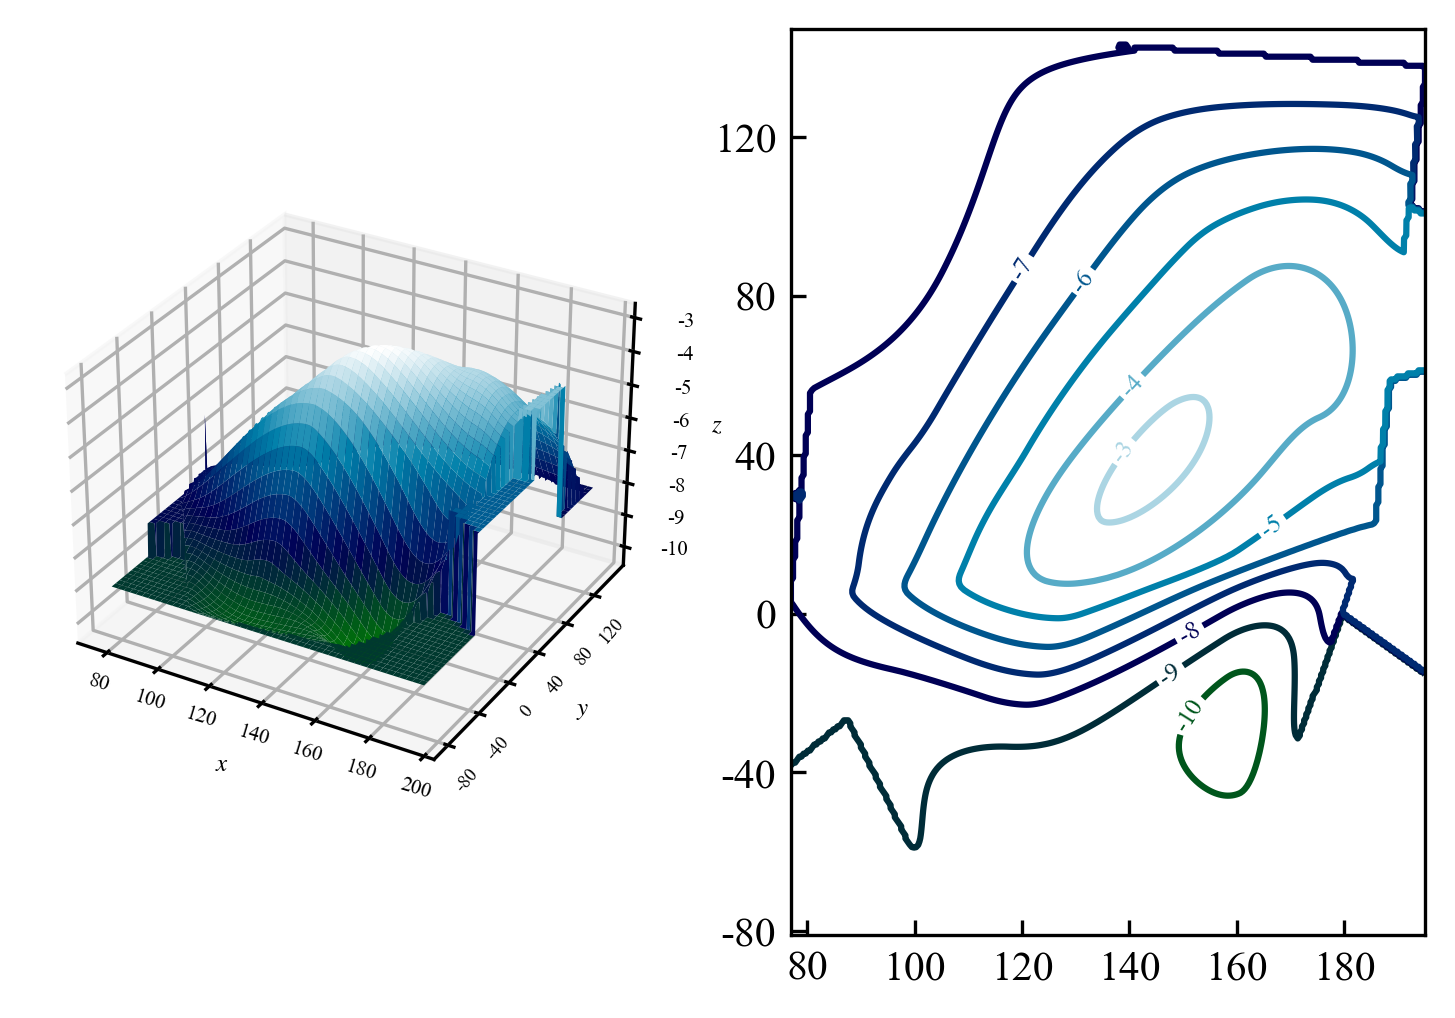

In [277]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, z3, cmap='ocean')
ax.set_xlabel('$x$', fontsize=6, labelpad=-10)
ax.set_ylabel('$y$', fontsize=6, labelpad=-10)
ax.set_zlabel('$z$', fontsize=6, labelpad=-8)
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_locator(MultipleLocator(40))
ax.tick_params(which='major', width=0.5, labelsize=5, axis='z', pad=-0.5)
ax.tick_params(which='major', width=0.5, labelsize=5, axis='x', pad=-5, rotation=-17)
ax.tick_params(which='major', width=0.5, labelsize=4.5, axis='y', pad=-4, rotation=49)

ax1 = fig.add_subplot(122)
contr = ax1.contour(X, Y, z3, cmap='ocean')
ax1.clabel(contr, fontsize=6)
ax1.xaxis.set_major_locator(MultipleLocator(20))
ax1.yaxis.set_major_locator(MultipleLocator(40))

fig.show()